![image](https://github.com/eWaterCycle/ewatercycle/raw/main/docs/examples/logo.png)

# Generate forcing in eWaterCycle with ESMValTool

This notebooks shows how to generate forcing data for PCR-GLOBWB model using ERA5 data and [ESMValTool hydrological recipes](https://docs.esmvaltool.org/en/latest/recipes/recipe_hydrology.html#pcr-globwb). More information about data, configuration and installation instructions can be found in the [System setup](https://ewatercycle.readthedocs.io/en/latest/system_setup.html) in the eWaterCycle documentation.

In [1]:
import logging
import warnings
from pathlib import Path
warnings.filterwarnings("ignore", category=UserWarning)

logger = logging.getLogger("esmvalcore")
logger.setLevel(logging.WARNING)

In [2]:
import xarray as xr
from rich import print

import ewatercycle.forcing

Forcing for PCRGlobWB is created using the ESMValTool recipe. It produces one file per each variable: temperature, and precipitation. You can set the start and end date, and the region. See [eWaterCycle documentation](https://ewatercycle.readthedocs.io/en/latest/apidocs/ewatercycle.forcing.html#submodules) for more information. 

In [3]:
prepared_forcing_path_caravan_central = Path("/data/eurocsdms-data/forcing/camelsgb_73010/caravan")

In [4]:
# option two: load data that you or someone else generated previously
camelsgb_forcing = ewatercycle.forcing.sources['CaravanForcing'].load(directory=prepared_forcing_path_caravan_central)

In [5]:
esmvaltool_padding = 1.5

pcrglobwb_forcing = ewatercycle.forcing.sources["PCRGlobWBForcing"].generate(
    dataset="ERA5",
    start_time="1990-01-01T00:00:00Z",
    end_time="1992-12-31T00:00:00Z",
    start_time_climatology="1990-01-01T00:00:00Z",
    end_time_climatology="1992-01-01T00:00:00Z",
    shape=camelsgb_forcing.shape,
    extract_region={
    "start_longitude": -6-esmvaltool_padding,
    "end_longitude": 3+esmvaltool_padding,
    "start_latitude": 49-esmvaltool_padding,
    "end_latitude": 61+esmvaltool_padding,},
    directory = "/home/rhut/forcing/UK"

)

In [6]:
print(pcrglobwb_forcing)

PCRGlobWBForcing(
    start_time='1990-01-01T00:00:00Z',
    end_time='1992-12-31T00:00:00Z',
    directory=PosixPath('/home/rhut/forcing/UK/work/diagnostic/script'),
    shape=PosixPath('/data/eurocsdms-data/forcing/camelsgb_73010/caravan/camelsgb_73010.shp'),
    filenames={},
    precipitationNC='pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_1990-1992_camelsgb_73010.nc',
    temperatureNC='pcrglobwb_OBS6_ERA5_reanaly_1_day_tas_1990-1992_camelsgb_73010.nc'
)

### Plot forcing

<xarray.Dataset> Size: 18MB
Dimensions:    (time: 1461, lat: 61, lon: 49, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 12kB 1989-01-01 1989-01-02 ... 1992-12-31
  * lat        (lat) float32 244B 62.5 62.25 62.0 61.75 ... 48.0 47.75 47.5
  * lon        (lon) float32 196B -7.499 -7.249 -6.999 ... 4.001 4.251 4.501
    height     float64 8B 2.0
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 17MB 278.9 278.8 278.6 ... 269.3 269.3
    time_bnds  (time, bnds) datetime64[ns] 23kB 1988-12-31T12:00:00 ... 1992-...
    lat_bnds   (lat, bnds) float32 488B 62.62 62.38 62.38 ... 47.62 47.62 47.38
    lon_bnds   (lon, bnds) float32 392B -7.625 -7.375 -7.375 ... 4.375 4.625
Attributes:
    Conventions:  CF-1.7
    software:     Created with ESMValTool v2.11.0
    caption:      Forcings for the PCR-GLOBWB hydrological model.

------------------------

<xarray.Dataset> Size: 18MB
Dimensions:    (time: 1461, lat: 61, lon: 49, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 12kB 1989-01-01 1989-01-02 ... 1992-12-31
  * lat        (lat) float32 244B 62.5 62.25 62.0 61.75 ... 48.0 47.75 47.5
  * lon        (lon) float32 196B -7.499 -7.249 -6.999 ... 4.001 4.251 4.501
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float32 17MB 0.005214 0.005037 ... 0.0001493
    time_bnds  (time, bnds) datetime64[ns] 23kB 1988-12-31T12:00:00 ... 1992-...
    lat_bnds   (lat, bnds) float32 488B 62.62 62.38 62.38 ... 47.62 47.62 47.38
    lon_bnds   (lon, bnds) float32 392B -7.625 -7.375 -7.375 ... 4.375 4.625
Attributes:
    Conventions:  CF-1.7
    software:     Created with ESMValTool v2.11.0
    caption:      Forcings for the PCR-GLOBWB hydrological model.

------------------------

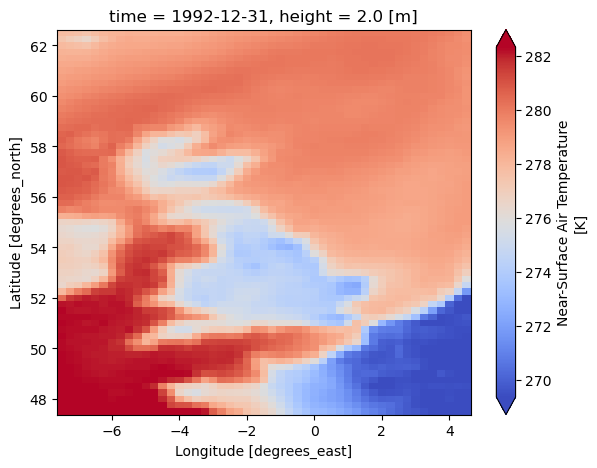

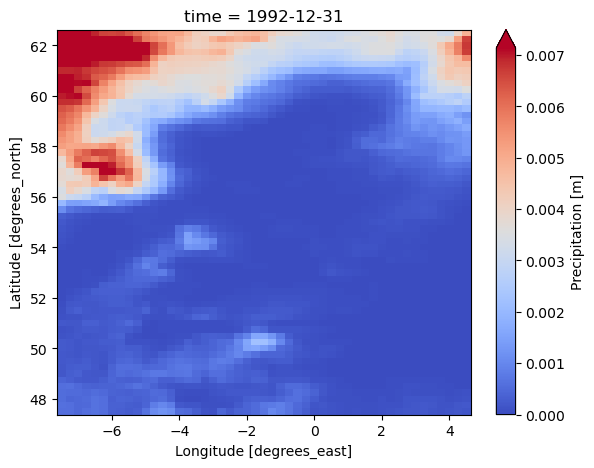

In [7]:
for file_name in [pcrglobwb_forcing.temperatureNC, pcrglobwb_forcing.precipitationNC]:
    dataset = xr.load_dataset(f"{pcrglobwb_forcing.directory}/{file_name}")
    print(dataset)
    print("------------------------")
    var = list(dataset.data_vars.keys())[0]
    dataset[var].isel(time=-1).plot(cmap="coolwarm", robust=True, size=5)